In [63]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)


Dataset generation process-
1. Created 500 data points for training.
2. Each with 2 features
3. Defined 5 cluster centers for our 5 classes.
4. Convert class labels (0, 1, 2, 3, 4) to one-hot encoded vectors multi-class classification with softmax output







In [10]:
#took 500 samples

n_samples = 500
X = np.random.randn(n_samples, 2) * 2

centers = np.array([[0, 0], [4, 4], [-4, 4], [4, -4], [-4, -4]])
Y = np.zeros((n_samples, 1))

for i in range(n_samples):
    distances = np.sqrt(np.sum((X[i] - centers) ** 2, axis=1))
    Y[i] = np.argmin(distances)

def one_hot_encode(y, num_classes):
    encoded = np.zeros((len(y), num_classes))
    for i in range(len(y)):
        encoded[i, int(y[i])] = 1
    return encoded

Y_onehot = one_hot_encode(Y, 5)



/tmp/ipython-input-2414435654.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  encoded[i, int(y[i])] = 1


1. Initialize neural network with 3 hidden layers.
2. Two input features, 5 output neurons (one for each class)
3. Initialize weights with random values.
4. Sigmoid activation function for hidden layers
        Formula: σ(x) = 1 / (1 + e^(-x)). It makes values between 0 and 1, which isgood for probabilities.
5.  Softmax activation for output layer
        Formula: softmax(x_i) = e^(x_i) / Σ_j e^(x_j). It converts raw scores to probabilities that sum to 1.
6. Feed Forward Network pass through the network
        takes input X, passes through all layers, and returns output probabilities.
7.  Backpropagation calculate how much each weight contributed to the error,
       and then adjust weights to reduce the error.

In [56]:
class NeuralNetwork:
    def __init__(self):
        self.inputLayerNeurons = 2
        self.hidden1Neurons = 8
        self.hidden2Neurons = 6
        self.hidden3Neurons = 4
        self.outputLayerNeurons = 5

        self.learning_rate = 0.01

        self.W1 = np.random.randn(self.inputLayerNeurons, self.hidden1Neurons)
        self.W2 = np.random.randn(self.hidden1Neurons, self.hidden2Neurons)
        self.W3 = np.random.randn(self.hidden2Neurons, self.hidden3Neurons)
        self.W4 = np.random.randn(self.hidden3Neurons, self.outputLayerNeurons)

        self.b1 = np.zeros((1, self.hidden1Neurons))
        self.b2 = np.zeros((1, self.hidden2Neurons))
        self.b3 = np.zeros((1, self.hidden3Neurons))
        self.b4 = np.zeros((1, self.outputLayerNeurons))

    def sigmoid(self, x, der=False):
        if der:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def feedForward(self, X):

        self.hidden1_input = np.dot(X, self.W1) + self.b1
        self.hidden1_output = self.sigmoid(self.hidden1_input)

        self.hidden2_input = np.dot(self.hidden1_output, self.W2) + self.b2
        self.hidden2_output = self.sigmoid(self.hidden2_input)

        self.hidden3_input = np.dot(self.hidden2_output, self.W3) + self.b3
        self.hidden3_output = self.sigmoid(self.hidden3_input)

        self.output_input = np.dot(self.hidden3_output, self.W4) + self.b4
        self.output = self.softmax(self.output_input)

        return self.output

    def backPropagation(self, X, Y, output):

        error = output - Y

        output_delta = error

        hidden3_error = output_delta.dot(self.W4.T)
        hidden3_delta = hidden3_error * self.sigmoid(self.hidden3_output, der=True)

        hidden2_error = hidden3_delta.dot(self.W3.T)
        hidden2_delta = hidden2_error * self.sigmoid(self.hidden2_output, der=True)

        hidden1_error = hidden2_delta.dot(self.W2.T)
        hidden1_delta = hidden1_error * self.sigmoid(self.hidden1_output, der=True)

        self.W4 -= self.learning_rate * self.hidden3_output.T.dot(output_delta)
        self.W3 -= self.learning_rate * self.hidden2_output.T.dot(hidden3_delta)
        self.W2 -= self.learning_rate * self.hidden1_output.T.dot(hidden2_delta)
        self.W1 -= self.learning_rate * X.T.dot(hidden1_delta)

        self.b4 -= self.learning_rate * np.sum(output_delta, axis=0, keepdims=True)
        self.b3 -= self.learning_rate * np.sum(hidden3_delta, axis=0, keepdims=True)
        self.b2 -= self.learning_rate * np.sum(hidden2_delta, axis=0, keepdims=True)
        self.b1 -= self.learning_rate * np.sum(hidden1_delta, axis=0, keepdims=True)

    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X, Y, output)
        return output

    def predict(self, X):
        output = self.feedForward(X)
        return np.argmax(output, axis=1)


nn = NeuralNetwork()
err = []
accuracies = []

for i in range(1000):
    output = nn.train(X, Y_onehot)

    loss = -np.mean(Y_onehot * np.log(output + 1e-10))
    err.append(loss)

    predictions = np.argmax(output, axis=1)
    true_labels = np.argmax(Y_onehot, axis=1)
    accuracy = np.mean(predictions == true_labels)
    accuracies.append(accuracy)

    if i % 100 == 0:
        print(f"Epoch {i}: Loss = {loss:.4f}, Accuracy = {accuracy:.4f}")

Epoch 0: Loss = 0.3236, Accuracy = 0.0660
Epoch 100: Loss = 0.1308, Accuracy = 0.7680
Epoch 200: Loss = 0.0849, Accuracy = 0.8720
Epoch 300: Loss = 0.0793, Accuracy = 0.8520
Epoch 400: Loss = 0.1020, Accuracy = 0.7920
Epoch 500: Loss = 0.0567, Accuracy = 0.9080
Epoch 600: Loss = 0.0224, Accuracy = 0.9580
Epoch 700: Loss = 0.0204, Accuracy = 0.9700
Epoch 800: Loss = 0.0184, Accuracy = 0.9780
Epoch 900: Loss = 0.0169, Accuracy = 0.9720


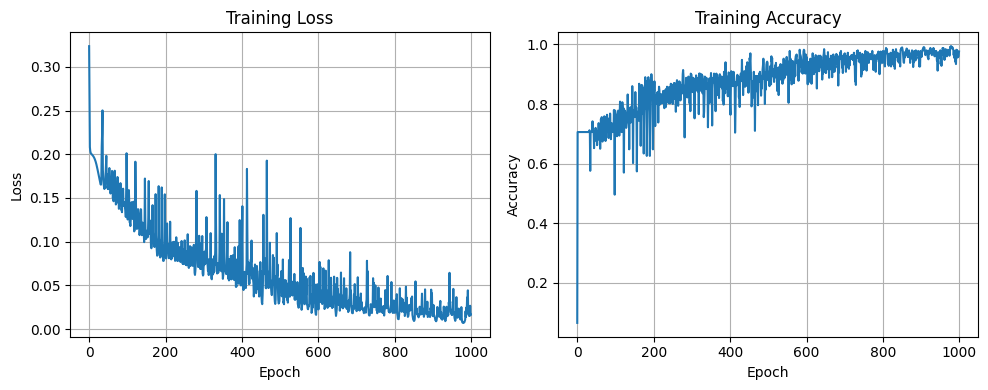

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].plot(err)
axes[0].set_title('Training Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].grid(True)

axes[1].plot(accuracies)
axes[1].set_title('Training Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [58]:
print("Testing random points")


test_points = np.array([
    [0, 0], [4, 4], [-4, 4], [4, -4], [-4, -4],])

for i, point in enumerate(test_points):
    prediction = nn.predict(point.reshape(1, -1))[0]
    print(f"Point {point}: Predicted Class = {prediction} (True Class = {i})")


Testing random points
Point [0 0]: Predicted Class = 0 (True Class = 0)
Point [4 4]: Predicted Class = 1 (True Class = 1)
Point [-4  4]: Predicted Class = 2 (True Class = 2)
Point [ 4 -4]: Predicted Class = 3 (True Class = 3)
Point [-4 -4]: Predicted Class = 4 (True Class = 4)


In [59]:
print("Print all classes")

all_predictions = nn.predict(X)
true_labels = np.argmax(Y_onehot, axis=1)

overall_accuracy = np.mean(all_predictions == true_labels)
print(f"Overall Accuracy on Training Data: {overall_accuracy:.4f}")

Print all classes
Overall Accuracy on Training Data: 0.9880


In [60]:
print(f"\nInitial loss: {err[0]:.4f}")
print(f"Final loss: {err[-1]:.4f}")
print(f"Loss decreased by: {err[0] - err[-1]:.4f}")


Initial loss: 0.3236
Final loss: 0.0164
Loss decreased by: 0.3072


In [61]:
predictions = nn.predict(X)
true_labels = Y.flatten()

confusion_matrix = np.zeros((5, 5), dtype=int)
for i in range(len(true_labels)):
    confusion_matrix[int(true_labels[i]), predictions[i]] += 1

print("Confusion Matrix:")
print(confusion_matrix)

Confusion Matrix:
[[353   0   0   0   0]
 [  1  30   1   0   0]
 [  0   0  47   0   0]
 [  4   0   0  29   0]
 [  0   0   0   0  35]]


In [62]:
print("\nClass-wise Performance:")
for class_idx in range(5):
    tp = confusion_matrix[class_idx, class_idx]
    fp = np.sum(confusion_matrix[:, class_idx]) - tp
    fn = np.sum(confusion_matrix[class_idx, :]) - tp

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    print(f"Class {class_idx}: Precision={precision:.4f}, Recall={recall:.4f}, F1={f1:.4f}")


Class-wise Performance:
Class 0: Precision=0.9860, Recall=1.0000, F1=0.9930
Class 1: Precision=1.0000, Recall=0.9375, F1=0.9677
Class 2: Precision=0.9792, Recall=1.0000, F1=0.9895
Class 3: Precision=1.0000, Recall=0.8788, F1=0.9355
Class 4: Precision=1.0000, Recall=1.0000, F1=1.0000
